In [130]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

In [131]:
#Importing the training dataset
globalHealthDataFrame= pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv',
            delimiter=',')

In [132]:
#Removing ID column from the daraframe
modified_globalHealthDataFrame = globalHealthDataFrame.drop(['ID'], axis=1)

In [133]:
modified_globalHealthDataFrame.describe()

TARGET_LifeExpectancy      Country         Year       Status  \
count            2071.000000  2071.000000  2071.000000  2071.000000   
mean               69.274505    95.360212  2009.518590     0.185418   
std                 9.482281    54.861641     4.614147     0.388730   
min                37.300000     0.000000  2002.000000     0.000000   
25%                63.000000    50.000000  2006.000000     0.000000   
50%                71.200000    94.000000  2010.000000     0.000000   
75%                76.000000   144.000000  2014.000000     0.000000   
max                92.700000   192.000000  2017.000000     1.000000   

       AdultMortality  AdultMortality-Male  AdultMortality-Female  \
count     2071.000000          2071.000000            2071.000000   
mean       162.833897           161.908257             163.759536   
std        118.872170           119.442235             118.800292   
min          1.000000             0.000000               2.000000   
25%         74.000000            74.000000              74.000000   
50%        144.000000           142.000000             144.000000   
75%        228.000000           228.000000             230.000000   
max        699.000000           704.000000             722.000000   

       InfantDeaths      Alcohol  PercentageExpenditure  ...        Polio  \
count   2071.000000  2071.000000            2071.000000  ...  2071.000000   
mean      33.079672     4.696379             764.540216  ...    82.727185   
std      135.832868     4.205888            2081.880374  ...    23.188837   
min        0.000000     0.010000               0.000000  ...     3.000000   
25%        0.000000     0.615000               5.848550  ...    77.000000   
50%        3.000000     3.830000              69.020425  ...    93.000000   
75%       22.000000     7.840000             430.190047  ...    97.000000   
max     1800.000000    17.870000           19479.911610  ...    99.000000   

       TotalExpenditure   Diphtheria     HIV-AIDS            GDP  \
count       2071.000000  2071.000000  2071.000000    2071.000000   
mean           5.883858    82.753259     1.632883    7352.742342   
std            2.554965    23.130969     4.782325   15219.978663   
min            0.370000     2.000000     0.100000       1.880000   
25%            4.190000    78.000000     0.100000     413.730000   
50%            5.640000    93.000000     0.100000    1410.670000   
75%            7.430000    97.000000     0.800000    5811.295000   
max           17.600000    99.000000    50.600000  133473.470000   

         Population  Thinness1-19years  Thinness5-9years  \
count  2.071000e+03        2071.000000       2071.000000   
mean   1.203741e+07           4.941284          4.977306   
std    6.391797e+07           4.697830          4.785532   
min    3.400000e+01           0.100000          0.100000   
25%    1.274450e+05           1.600000          1.500000   
50%    6.522310e+05           3.200000          3.300000   
75%    5.371104e+06           7.400000          7.400000   
max    1.293859e+09          27.700000         28.600000   

       IncomeCompositionOfResources    Schooling  
count                   2071.000000  2071.000000  
mean                       0.609551     3.372453  
std                        0.216532     0.590832  
min                        0.000000     0.000000  
25%                        0.463000     3.065942  
50%                        0.655000     3.449638  
75%                        0.769500     3.741657  
max                        0.948000     4.381780  

[8 rows x 23 columns]

In [134]:
#Define X(input) Y(Output) variables
X = modified_globalHealthDataFrame[modified_globalHealthDataFrame.columns[1:23]]
Y = modified_globalHealthDataFrame[['TARGET_LifeExpectancy']]

In [105]:
#Normalize features using MinMax Scaler
min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)

In [90]:
# create testing and training data for features
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1656, 22)
(415, 22)
(1656, 1)
(415, 1)


In [135]:
from sklearn import linear_model
linReg = linear_model.LinearRegression(normalize=False)
linReg.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
print(linReg.intercept_)
print(linReg.coef_)

[54.70286671]
[[ 3.54141180e-01  6.14663895e-01  2.59039176e+00  6.43891329e+12
  -3.24713106e+12 -3.32092949e+12  1.76852022e+02  2.83363455e+00
  -3.09618090e-01 -1.69443952e+00  3.06690157e+00 -1.81939266e+02
   2.16926937e+00 -5.27614358e-01  2.77782443e+00 -2.57537332e+01
   5.65255500e+00 -2.41619486e+00 -1.98587832e+00 -1.03765039e+00
   5.65005079e+00  1.08483106e+01]]


In [98]:
predYLE = linReg.predict(testX)

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean squared error: ', mean_squared_error(testY, predYLE))
print('Mean absolute error: ', mean_absolute_error(testY, predYLE))
print('R-squared error: ',r2_score(testY, predYLE))

Mean squared error:  23.694721078882907
Mean absolute error:  3.731288499009817
R-squared error:  0.7654068121538554


In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean squared error ', mean_squared_error(testY, predYLE))
print('Mean absolute error ', mean_absolute_error(testY, predYLE))
print('R-squared error: ',r2_score(testY, predYLE))

Mean squared error  23.694721078882907
Mean absolute error  3.731288499009817
R-squared error:  0.7654068121538554


In [125]:
#Using 10-Fold cross validation
from sklearn import model_selection
number_splits = 10
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

In [ ]:
#Using 10-Fold cross validation
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

number_splits = 10
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

lRegPara = np.linspace(0.01,.5,num=30)

from sklearn import linear_model
linReg = linear_model.LinearRegression(normalize=False)

plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
    LinRidgeReg = linear_model.Lasso(alpha=regPara, normalize=False)
    LinRidgeReg.fit(trainX, trainY)
    predY = LinRidgeReg.predict(validX)
    mse = mean_squared_error(validY, predY)

In [140]:
lRegPara = np.linspace(0.001,.5,num=20)

In [141]:
from sklearn import linear_model
linReg = linear_model.LinearRegression(normalize=False)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.036913e-23
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.463729e-21
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.837090e-21
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

[22.37068182 22.37064196 22.37060306 22.37056511 22.37052811 22.37049206
 22.37045696 22.37042279 22.37038955 22.37035724 22.37032585 22.37029538
 22.37026582 22.37023718 22.37020943 22.37018259 22.37015665 22.37013159
 22.37010742 22.37008414]
Standard Deviation:  2.6177200516860823


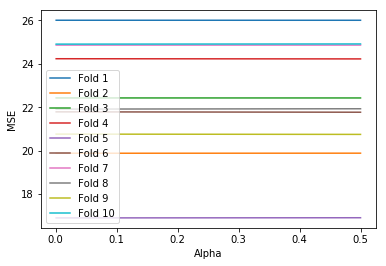

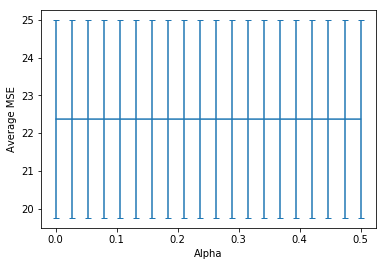

In [142]:
#10Fold Cross Validation with Ridge Regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
    # This is where you're polynomial model is used!
#     LinFitTrainX = linReg.fit(trainX)
#     LinFitValidX = linReg.fit(validX)
    
    for j , regPara in enumerate(lRegPara):
        LinRidgeReg = linear_model.Ridge(alpha=regPara, normalize=False)
        LinRidgeReg.fit(trainX, trainY)
        predY = LinRidgeReg.predict(validX)
        mse = mean_squared_error(validY, predY)
#         print(mse)
        
        lResults[nsplit, j] = (mse)
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()


plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")
print(np.mean(lResults,axis=0))
print("Standard Deviation: ", np.std(lResults))


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordin

[21.78246018 21.78246018 21.78246018 21.78246018 21.78246018 21.78246018
 21.78246018 21.78246018 21.78246018 21.78246018 21.78246018 21.78246018
 21.78246018 21.78246018 21.78246018 21.78246018 21.78246018 21.78246018
 21.78246018 21.78246018]
Standard Deviation:  1.9004569505194457


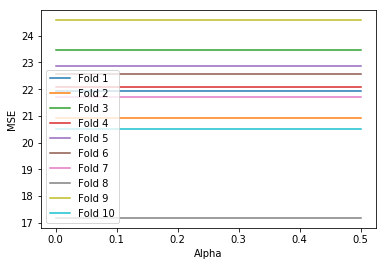

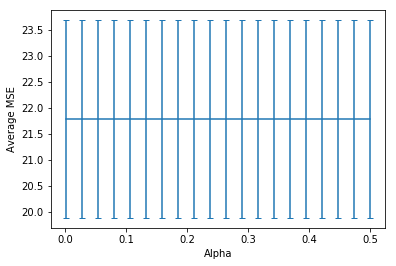

In [143]:
#10Fold Cross Validation with Lasso Regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
    for j , regPara in enumerate(lRegPara):
        LinLassoReg = linear_model.Lasso(alpha=regPara, normalize=False)
        LinLassoReg.fit(trainX, trainY)
        predY = LinRidgeReg.predict(validX)
        mse = mean_squared_error(validY, predY)
#         print(mse)
        
        lResults[nsplit, j] = (mse)
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()


plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")
print(np.mean(lResults,axis=0))
print("Standard Deviation: ", np.std(lResults))

In [158]:
#Pick the best Alpha value and produce the MAE, MSE, R sqaured

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
Total_MSE = 0
Total_MAE = 0
Total_r2 = 0

for trainIndex, validIndex in kFold.split(X):
    # Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
   
    LinLassoReg = linear_model.Lasso(alpha=0.1000, normalize=False)
    LinLassoReg.fit(trainX, trainY)
    predY = LinRidgeReg.predict(validX)
    mse = mean_squared_error(validY, predY)
    mae = mean_absolute_error(validY, predY)
    r2 = r2_score(validY, predY)
    Total_MSE = Total_MSE + mse
    Total_MAE = Total_MAE + mae
    Total_r2 = Total_r2 + r2
print(Total_MSE/10)
print(Total_MAE/10)
print(Total_r2/10)
#   
        
#         lResults[nsplit, j] = (mse)
#     plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
#     nsplit = nsplit + 1
    
# plt.xlabel("Alpha")
# plt.ylabel("MSE")
# plt.legend()


# plt.figure()
# plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
# plt.xlabel("Alpha")
# plt.ylabel("Average MSE")
# print(np.mean(lResults,axis=0))
# print("Standard Deviation: ", np.std(lResults))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordin

21.782830911119113
3.5697148643769365
0.7556365243824776


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

MSE :  33.326133354305306


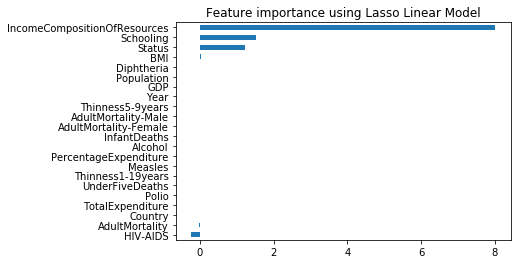

In [113]:
from sklearn.metrics import mean_squared_error
trainX, validX, trainY, validY = model_selection.train_test_split(X, Y, test_size=0.20)
LassoReg = linear_model.Lasso(alpha=0.05, normalize=True)
LassoReg.fit(trainX, trainY)
predY = LassoReg.predict(validX)
mse = mean_squared_error(validY, predY)
print("MSE : ", mse)
coef = pd.Series(np.squeeze(LassoReg.coef_), index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Linear Model")
plt.show()

In [79]:
#Normalization
trainXn = trainX.copy()
validXn = validX.copy()

# make sure you dont have negative vlaues
trainXn['LSTAT'] = np.log10(trainXn['LSTAT'])
validXn['LSTAT'] = np.log10(validXn['LSTAT'])

LassoReg = linear_model.Lasso(alpha=0.05, normalize=True)
LassoReg.fit(trainXn, trainY)
predY = LassoReg.predict(validXn)
mse = mean_squared_error(validY, predY)
print("MSE : ", mse)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices